* http://stackoverflow.com/questions/2224602/parsing-table-with-beautifulsoup-and-write-in-text-file
* http://www.canbike.org/information-technology/yahoo-finance-url-download-to-a-csv-file.html
* http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Panel.html
* https://ipython.org/ipython-doc/3/interactive/magics.html

In [2]:
%matplotlib inline

from bs4 import BeautifulSoup
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import requests
import re
import seaborn as sns

In [3]:
r = requests.get('https://www.asx300list.com/').content
print(r)

b'<!DOCTYPE html>\n<html lang="en-AU" prefix="og: http://ogp.me/ns#">\n<head>\n    <meta charset="UTF-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <link rel="profile" href="http://gmpg.org/xfn/11">\n    <link rel="pingback" href="https://www.asx300list.com/xmlrpc.php">\n\n    <title>ASX 300 List - Data for ASX Top 300 Companies</title>\n\n<!-- This site is optimized with the Yoast SEO plugin v4.0 - https://yoast.com/wordpress/plugins/seo/ -->\n<meta name="description" content="Download an up-to-date list of Australia&#039;s top 300 companies. ASX 300 constituent data includes GICS Sectors, market cap and index weighting."/>\n<meta name="robots" content="noodp"/>\n<link rel="canonical" href="https://www.asx300list.com/" />\n<meta property="og:locale" content="en_US" />\n<meta property="og:type" content="website" />\n<meta property="og:title" content="ASX 300 List - Data for ASX Top 300 Companies" />\n<meta property="og:description" content="Downlo

In [4]:
soup = BeautifulSoup(r, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-AU" prefix="og: http://ogp.me/ns#">
 <head>
  <meta charset="utf-8">
   <meta content="width=device-width, initial-scale=1.0" name="viewport">
    <link href="http://gmpg.org/xfn/11" rel="profile">
     <link href="https://www.asx300list.com/xmlrpc.php" rel="pingback">
      <title>
       ASX 300 List - Data for ASX Top 300 Companies
      </title>
      <!-- This site is optimized with the Yoast SEO plugin v4.0 - https://yoast.com/wordpress/plugins/seo/ -->
      <meta content="Download an up-to-date list of Australia's top 300 companies. ASX 300 constituent data includes GICS Sectors, market cap and index weighting." name="description"/>
      <meta content="noodp" name="robots"/>
      <link href="https://www.asx300list.com/" rel="canonical"/>
      <meta content="en_US" property="og:locale"/>
      <meta content="website" property="og:type"/>
      <meta content="ASX 300 List - Data for ASX Top 300 Companies" property="og:title"/>
      <meta content

In [5]:
table = soup.find('table', {'class' : 'tableizer-table sortable'})
print(table)

<table class="tableizer-table sortable">
<thead>
<tr class="tableizer-firstrow">
<th>Code</th>
<th>Company</th>
<th>Sector</th>
<th>Market Cap</th>
<th>Weight(%)</th>
</tr>
</thead>
<tbody>
<tr>
<td>A2M</td>
<td>The A2 Milk Company Limited NZ</td>
<td>Consumer Staples</td>
<td>1,761,040,000</td>
<td>0.11</td>
</tr>
<tr>
<td>AAC</td>
<td>Australian Agricultural Company Limited</td>
<td>Consumer Staples</td>
<td>938,633,000</td>
<td>0.06</td>
</tr>
<tr>
<td>AAD</td>
<td>Ardent Leisure Group Stapled</td>
<td>Consumer Discretionary</td>
<td>1,008,550,000</td>
<td>0.06</td>
</tr>
<tr>
<td>ABC</td>
<td>Adelaide Brighton Limited</td>
<td>Materials</td>
<td>3,332,730,000</td>
<td>0.21</td>
</tr>
<tr>
<td>ABP</td>
<td>Abacus Property Group Stapled</td>
<td>Real Estate</td>
<td>1,665,470,000</td>
<td>0.1</td>
</tr>
<tr>
<td>ACX</td>
<td>Aconex Limited</td>
<td>Information Technology</td>
<td>850,372,000</td>
<td>0.05</td>
</tr>
<tr>
<td>ADH</td>
<td>Adairs Limited</td>
<td>Consumer Discretionary

In [6]:
table_header = table.find('thead')
print(table_header)

<thead>
<tr class="tableizer-firstrow">
<th>Code</th>
<th>Company</th>
<th>Sector</th>
<th>Market Cap</th>
<th>Weight(%)</th>
</tr>
</thead>


In [7]:
table_body = table.find('tbody')
print(table_body)

<tbody>
<tr>
<td>A2M</td>
<td>The A2 Milk Company Limited NZ</td>
<td>Consumer Staples</td>
<td>1,761,040,000</td>
<td>0.11</td>
</tr>
<tr>
<td>AAC</td>
<td>Australian Agricultural Company Limited</td>
<td>Consumer Staples</td>
<td>938,633,000</td>
<td>0.06</td>
</tr>
<tr>
<td>AAD</td>
<td>Ardent Leisure Group Stapled</td>
<td>Consumer Discretionary</td>
<td>1,008,550,000</td>
<td>0.06</td>
</tr>
<tr>
<td>ABC</td>
<td>Adelaide Brighton Limited</td>
<td>Materials</td>
<td>3,332,730,000</td>
<td>0.21</td>
</tr>
<tr>
<td>ABP</td>
<td>Abacus Property Group Stapled</td>
<td>Real Estate</td>
<td>1,665,470,000</td>
<td>0.1</td>
</tr>
<tr>
<td>ACX</td>
<td>Aconex Limited</td>
<td>Information Technology</td>
<td>850,372,000</td>
<td>0.05</td>
</tr>
<tr>
<td>ADH</td>
<td>Adairs Limited</td>
<td>Consumer Discretionary</td>
<td>273,693,000</td>
<td>0.02</td>
</tr>
<tr>
<td>AGI</td>
<td>Ainsworth Game Technology Limited</td>
<td>Consumer Discretionary</td>
<td>587,677,000</td>
<td>0.04</td>
</tr>
<

In [8]:
# we will use these to gather data from the table
# and then to build our dataframe with
columns = []
data = []

# gather columns headers
for header in table_header.find_all('th'):
    column = re.sub('\W+','', header.string.strip().lower().replace (" ", "_"))
    columns.append(column)

# gather rows    
for tr in table_body.find_all('tr'):
    row = dict()

    for col, td in zip(columns, tr.find_all('td')):
        row[col] = td.string.strip()

    data.append(row)

# create table in dataframe format
index = pd.DataFrame(data, columns=columns)
index = index.apply(lambda x: pd.to_numeric(x, errors='ignore'))
index['yahoo_ticker'] = index['code'] + '.AX'
index.head()

code                                  company                  sector  \
0  A2M           The A2 Milk Company Limited NZ        Consumer Staples   
1  AAC  Australian Agricultural Company Limited        Consumer Staples   
2  AAD             Ardent Leisure Group Stapled  Consumer Discretionary   
3  ABC                Adelaide Brighton Limited               Materials   
4  ABP            Abacus Property Group Stapled             Real Estate   

      market_cap  weight yahoo_ticker  
0  1,761,040,000    0.11       A2M.AX  
1    938,633,000    0.06       AAC.AX  
2  1,008,550,000    0.06       AAD.AX  
3  3,332,730,000    0.21       ABC.AX  
4  1,665,470,000    0.10       ABP.AX

In [10]:
# top 5 constituents
index.sort_values(by='weight', ascending=False).head()

code                                          company      sector  \
59   CBA                   Commonwealth Bank of Australia  Financials   
289  WBC                      Westpac Banking Corporation  Financials   
21   ANZ  Australia And New Zealand Banking Group Limited  Financials   
44   BHP                             BHP Billiton Limited   Materials   
181  NAB                  National Australia Bank Limited  Financials   

          market_cap  weight yahoo_ticker  
59   137,044,000,000    8.46       CBA.AX  
289  105,906,000,000    6.54       WBC.AX  
21    83,960,000,000    5.19       ANZ.AX  
44    82,251,400,000    5.08       BHP.AX  
181   78,066,000,000    4.82       NAB.AX

In [22]:
# create distinct list of sectors
sectors = index['sector'].unique()
print(sectors)

['Consumer Staples' 'Consumer Discretionary' 'Materials' 'Real Estate'
 'Information Technology' 'Utilities' 'Industrials' 'Financials'
 'Health Care' 'Energy' 'Telecommunication Services']


sector
Financials                    34.56
Materials                     16.49
Real Estate                    8.14
Industrials                    7.44
Health Care                    6.95
Consumer Staples               6.75
Consumer Discretionary         6.37
Telecommunication Services     4.77
Energy                         4.52
Utilities                      2.41
Information Technology         1.51
Name: weight, dtype: float64


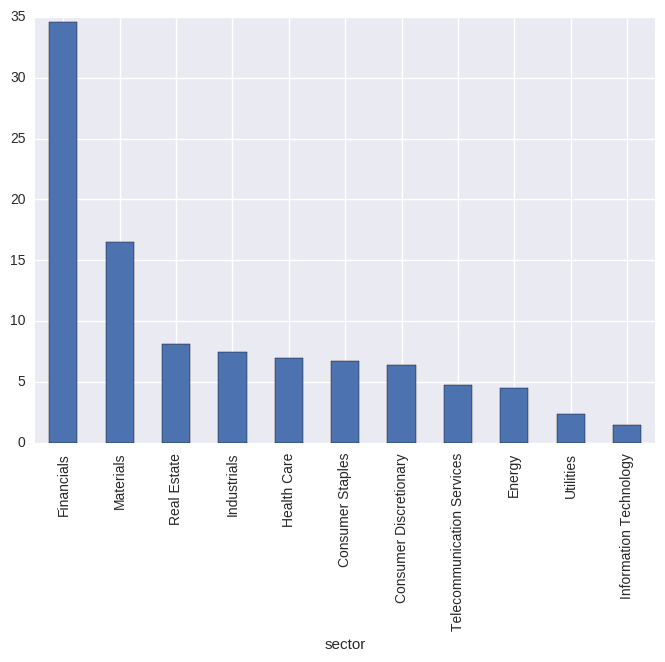

In [11]:
sector_weights = index.groupby(by='sector')['weight'].sum().sort_values(ascending=False)
ax = sector_weights.plot(kind='bar')
print(sector_weights)

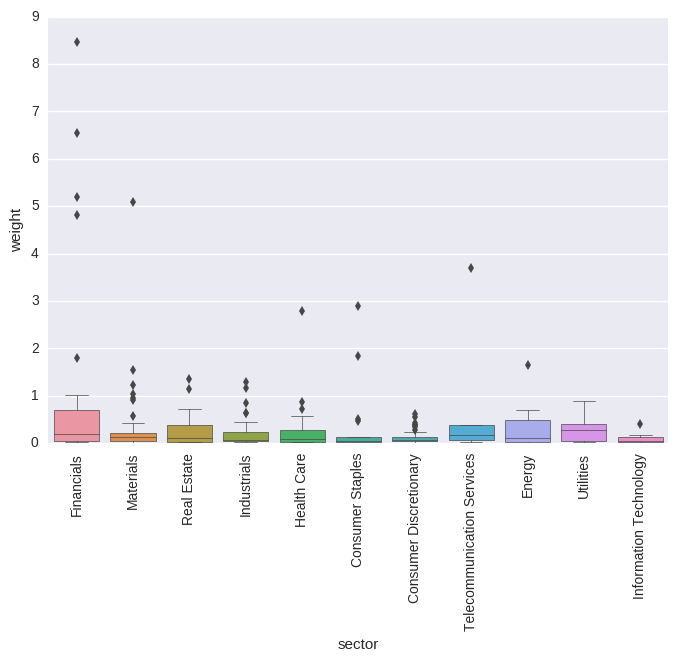

In [12]:
ax = sns.boxplot(data=index, x='sector', y='weight', linewidth=0.5, order=sector_weights.keys())
ax = plt.xticks(rotation=90)

sector
Consumer Discretionary        56
Materials                     51
Financials                    35
Real Estate                   34
Industrials                   32
Consumer Staples              23
Health Care                   22
Information Technology        17
Energy                        15
Utilities                      8
Telecommunication Services     7
Name: weight, dtype: int64


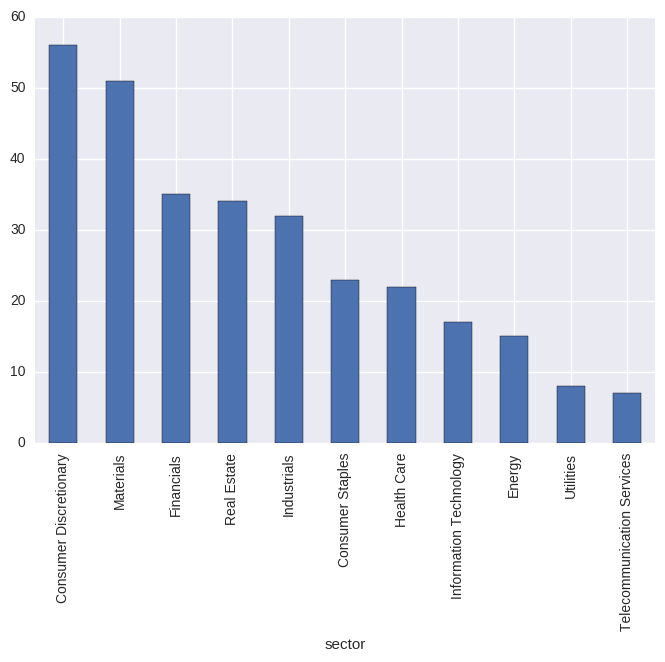

In [13]:
sector_counts = index.groupby(by='sector')['weight'].count().sort_values(ascending=False)
ax = sector_counts.plot(kind='bar')
print(sector_counts)

In [23]:
stocks = index['yahoo_ticker'].values.tolist()
print(stocks)

['A2M.AX', 'AAC.AX', 'AAD.AX', 'ABC.AX', 'ABP.AX', 'ACX.AX', 'ADH.AX', 'AGI.AX', 'AGL.AX', 'AHG.AX', 'AHY.AX', 'AIA.AX', 'AJA.AX', 'AJX.AX', 'ALL.AX', 'ALQ.AX', 'ALU.AX', 'AMA.AX', 'AMC.AX', 'AMP.AX', 'ANN.AX', 'ANZ.AX', 'AOG.AX', 'APA.AX', 'API.AX', 'APN.AX', 'APO.AX', 'AQG.AX', 'ARB.AX', 'ARF.AX', 'ASB.AX', 'AST.AX', 'ASX.AX', 'AVN.AX', 'AWC.AX', 'AWE.AX', 'AYS.AX', 'AZJ.AX', 'BAL.AX', 'BAP.AX', 'BBN.AX', 'BDR.AX', 'BEN.AX', 'BGA.AX', 'BHP.AX', 'BKL.AX', 'BKW.AX', 'BLA.AX', 'BLD.AX', 'BOQ.AX', 'BPT.AX', 'BRG.AX', 'BSL.AX', 'BTT.AX', 'BWP.AX', 'BWX.AX', 'BXB.AX', 'CAB.AX', 'CAR.AX', 'CBA.AX', 'CCL.AX', 'CCP.AX', 'CCV.AX', 'CDD.AX', 'CGC.AX', 'CGF.AX', 'CHC.AX', 'CIM.AX', 'CKF.AX', 'CL1.AX', 'CMW.AX', 'CNU.AX', 'COH.AX', 'CPU.AX', 'CQR.AX', 'CSL.AX', 'CSR.AX', 'CSV.AX', 'CTD.AX', 'CTX.AX', 'CVO.AX', 'CWN.AX', 'CWP.AX', 'CWY.AX', 'CYB.AX', 'DCN.AX', 'DLX.AX', 'DMP.AX', 'DNA.AX', 'DOW.AX', 'DRM.AX', 'DUE.AX', 'DXS.AX', 'ECX.AX', 'EHE.AX', 'ELD.AX', 'EML.AX', 'EPW.AX', 'EQT.AX', 'EVN.AX',

In [24]:
%%time
from pandas_datareader import data
from datetime import datetime, timedelta

#  10 years worth of data
n_days = 10 * 365

start = str(datetime.now() - timedelta(days=n_days))[:10]
end = str(datetime.now())[:10]   

panel = data.DataReader(stocks, 'yahoo', start, end)

/home/adrian/miniconda3/envs/sandpit/lib/python3.5/site-packages/pandas_datareader/base.py:192: SymbolWarning: Failed to read symbol: 'CL1.AX', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


CPU times: user 6.42 s, sys: 216 ms, total: 6.64 s
Wall time: 3min 37s


In [15]:
help(panel)

Help on Panel in module pandas.core.panel object:

class Panel(pandas.core.generic.NDFrame)
 |  Represents wide format panel data, stored as 3-dimensional array
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (items x major x minor), or dict of DataFrames
 |  items : Index or array-like
 |      axis=0
 |  major_axis : Index or array-like
 |      axis=1
 |  minor_axis : Index or array-like
 |      axis=2
 |  dtype : dtype, default None
 |      Data type to force, otherwise infer
 |  copy : boolean, default False
 |      Copy data from inputs. Only affects DataFrame / 2d ndarray input
 |  
 |  Method resolution order:
 |      Panel
 |      pandas.core.generic.NDFrame
 |      pandas.core.base.PandasObject
 |      pandas.core.base.StringMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __add__(self, other)
 |      # work only for scalars
 |  
 |  __and__(self, other)
 |      # work only for scalars
 |  
 |  __div__ = __truediv__(self, other)
 |  
 |  __eq__(self, 

In [25]:
panel.describe

<bound method NDFrame.describe of <class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 2604 (major_axis) x 300 (minor_axis)
Items axis: Open to Adj Close
Major_axis axis: 2006-12-19 00:00:00 to 2016-12-15 00:00:00
Minor_axis axis: A2M.AX to WTC.AX>

In [26]:
panel['Adj Close'].head()

A2M.AX   AAC.AX   AAD.AX   ABC.AX   ABP.AX  ACX.AX  ADH.AX  \
Date                                                                     
2006-12-19     NaN  1.62756  1.40929  1.32907  5.61690     NaN     NaN   
2006-12-20     NaN  1.62315  1.34564  1.34301  5.58586     NaN     NaN   
2006-12-21     NaN  1.63197  1.41105  1.32907  5.59017     NaN     NaN   
2006-12-22     NaN  1.61433  1.40171  1.29654  5.60575     NaN     NaN   
2006-12-25     NaN  1.61433      NaN  1.31028  5.74738     NaN     NaN   

             AGI.AX   AGL.AX  AHG.AX   ...     WEB.AX    WES.AX   WFD.AX  \
Date                                   ...                                 
2006-12-19  0.62649  8.58661   0.972   ...    0.82048  19.44247  4.62188   
2006-12-20  0.77238  8.59726   1.018   ...    0.83237  19.66893  4.64825   
2006-12-21  0.64365  8.56524   1.010   ...    0.85615  19.86377  4.71058   
2006-12-22  0.59215  8.58661   1.010   ...    0.83237  19.82690  4.78730   
2006-12-25  0.59737  8.57589   1.010   ...    0.83237  19.86377  4.79448   

            WHC.AX  WOR.AX    WOW.AX    WPL.AX   WPP.AX   WSA.AX  WTC.AX  
Date                                                                      
2006-12-19     NaN  13.836  12.69411  21.75469  1.11387  3.27579     NaN  
2006-12-20     NaN  14.003  12.90194  21.80586  1.12741  3.47162     NaN  
2006-12-21     NaN  14.103  13.09854  21.87406  1.11048  3.38261     NaN  
2006-12-22     NaN  14.103  13.24458  21.44780  1.11048  3.33810     NaN  
2006-12-25     NaN  14.210  13.28390  21.44780      NaN  3.33810     NaN  

[5 rows x 300 columns]

In [27]:
panel['Adj Close'].tail()

A2M.AX  AAC.AX  AAD.AX  ABC.AX  ABP.AX  ACX.AX  ADH.AX  AGI.AX  \
Date                                                                         
2016-12-09   2.310   1.630    2.29    5.06    2.84    4.32   1.625   1.985   
2016-12-12   2.160   1.620    2.29    5.03    2.82    4.35   1.660   1.975   
2016-12-13   2.160   1.585    2.27    5.03    2.89    4.48   1.605   1.985   
2016-12-14   2.050   1.580    2.32    5.16    2.94    4.80   1.625   2.030   
2016-12-15   1.985   1.585    2.30    5.12    2.89    4.89   1.720   2.040   

            AGL.AX  AHG.AX   ...    WEB.AX  WES.AX  WFD.AX  WHC.AX  WOR.AX  \
Date                         ...                                             
2016-12-09   21.17    3.67   ...      9.70   40.75    8.89    2.96    9.66   
2016-12-12   21.27    3.70   ...      9.45   40.81    8.82    2.96    9.74   
2016-12-13   21.12    3.70   ...      9.53   41.25    8.95    2.92    9.54   
2016-12-14   21.52    3.73   ...      9.80   41.60    9.07    2.79    9.55   
2016-12-15   21.18    3.82   ...      9.87   41.24    8.88    2.75    9.38   

            WOW.AX  WPL.AX  WPP.AX  WSA.AX  WTC.AX  
Date                                                
2016-12-09   22.91   30.59   1.015    3.07    5.78  
2016-12-12   22.85   31.48   1.025    3.14    5.60  
2016-12-13   22.82   31.65   1.045    3.18    5.60  
2016-12-14   22.96   31.88   1.045    3.19    5.70  
2016-12-15   23.05   31.00   1.060    2.97    5.80  

[5 rows x 300 columns]

In [18]:
panel['Volume'].head()

A2M.AX     AAC.AX     AAD.AX     ABC.AX    ABP.AX    ACX.AX  \
Date                                                                         
2016-05-30  4556700.0  2581700.0  1723500.0  1033200.0  340400.0  448700.0   
2016-05-31  4436300.0  1730500.0   732200.0  2223600.0  679900.0  652600.0   
2016-06-01  3147900.0  4894300.0  1199600.0  1833600.0  503000.0  382100.0   
2016-06-02  2224300.0  2244700.0   520300.0  1070700.0  439200.0  536800.0   
2016-06-03  1457400.0  2984600.0  1490800.0  1179200.0  354200.0  435800.0   

              ADH.AX    AGI.AX     AGL.AX     AHG.AX    ...       WEB.AX  \
Date                                                    ...                
2016-05-30  218700.0  319400.0  1482800.0   539100.0    ...     102100.0   
2016-05-31   40800.0  564700.0  2943400.0   909600.0    ...     105200.0   
2016-06-01   21400.0  137800.0  1933000.0   675000.0    ...      98100.0   
2016-06-02  110300.0  138400.0  1457000.0  1128700.0    ...      38400.0   
2016-06-03  555600.0  298100.0  1463600.0   937700.0    ...     109000.0   

               WES.AX     WFD.AX     WHC.AX     WOR.AX     WOW.AX     WPL.AX  \
Date                                                                           
2016-05-30  2358100.0  2275300.0  3736500.0  1704800.0  1540800.0  1608000.0   
2016-05-31  3145400.0  6114300.0  4957700.0  2309800.0  3392200.0  2944100.0   
2016-06-01  2239200.0  4003400.0  2239100.0  3418300.0  2287300.0  3084700.0   
2016-06-02  1780100.0  6270100.0  4090700.0  2388500.0  1823900.0  1724200.0   
2016-06-03  1428300.0  2519000.0  2962300.0  2216100.0  1821000.0  1973600.0   

               WPP.AX     WSA.AX    WTC.AX  
Date                                        
2016-05-30   551700.0   819500.0  115700.0  
2016-05-31  5485800.0  1726700.0   17000.0  
2016-06-01   720900.0  1015500.0  177700.0  
2016-06-02  1017400.0  1900200.0   11800.0  
2016-06-03   497200.0  1237500.0   50500.0  

[5 rows x 300 columns]

In [72]:
panel['log_returns'] = np.log(panel['Adj Close'] / panel['Adj Close'].shift())
panel['log_returns'].head()

A2M.AX    AAC.AX    AAD.AX    ABC.AX    ABP.AX  ACX.AX  ADH.AX  \
Date                                                                         
2006-12-19     NaN       NaN       NaN       NaN       NaN     NaN     NaN   
2006-12-20     NaN -0.002713 -0.046216  0.010434 -0.005542     NaN     NaN   
2006-12-21     NaN  0.005419  0.047464 -0.010434  0.000771     NaN     NaN   
2006-12-22     NaN -0.010868 -0.006641 -0.024780  0.002783     NaN     NaN   
2006-12-25     NaN  0.000000       NaN  0.010542  0.024951     NaN     NaN   

              AGI.AX    AGL.AX    AHG.AX   ...      WEB.AX    WES.AX  \
Date                                       ...                         
2006-12-19       NaN       NaN       NaN   ...         NaN       NaN   
2006-12-20  0.209344  0.001240  0.046239   ...    0.014388  0.011580   
2006-12-21 -0.182322 -0.003731 -0.007890   ...    0.028169  0.009857   
2006-12-22 -0.083395  0.002492  0.000000   ...   -0.028169 -0.001858   
2006-12-25  0.008777 -0.001249  0.000000   ...    0.000000  0.001858   

              WFD.AX  WHC.AX    WOR.AX    WOW.AX    WPL.AX    WPP.AX  \
Date                                                                   
2006-12-19       NaN     NaN       NaN       NaN       NaN       NaN   
2006-12-20  0.005689     NaN  0.011998  0.016240  0.002349  0.012083   
2006-12-21  0.013320     NaN  0.007116  0.015123  0.003123 -0.015131   
2006-12-22  0.016156     NaN  0.000000  0.011088 -0.019679  0.000000   
2006-12-25  0.001499     NaN  0.007558  0.002964  0.000000       NaN   

              WSA.AX  WTC.AX  
Date                          
2006-12-19       NaN     NaN  
2006-12-20  0.058062     NaN  
2006-12-21 -0.025974     NaN  
2006-12-22 -0.013246     NaN  
2006-12-25  0.000000     NaN  

[5 rows x 300 columns]

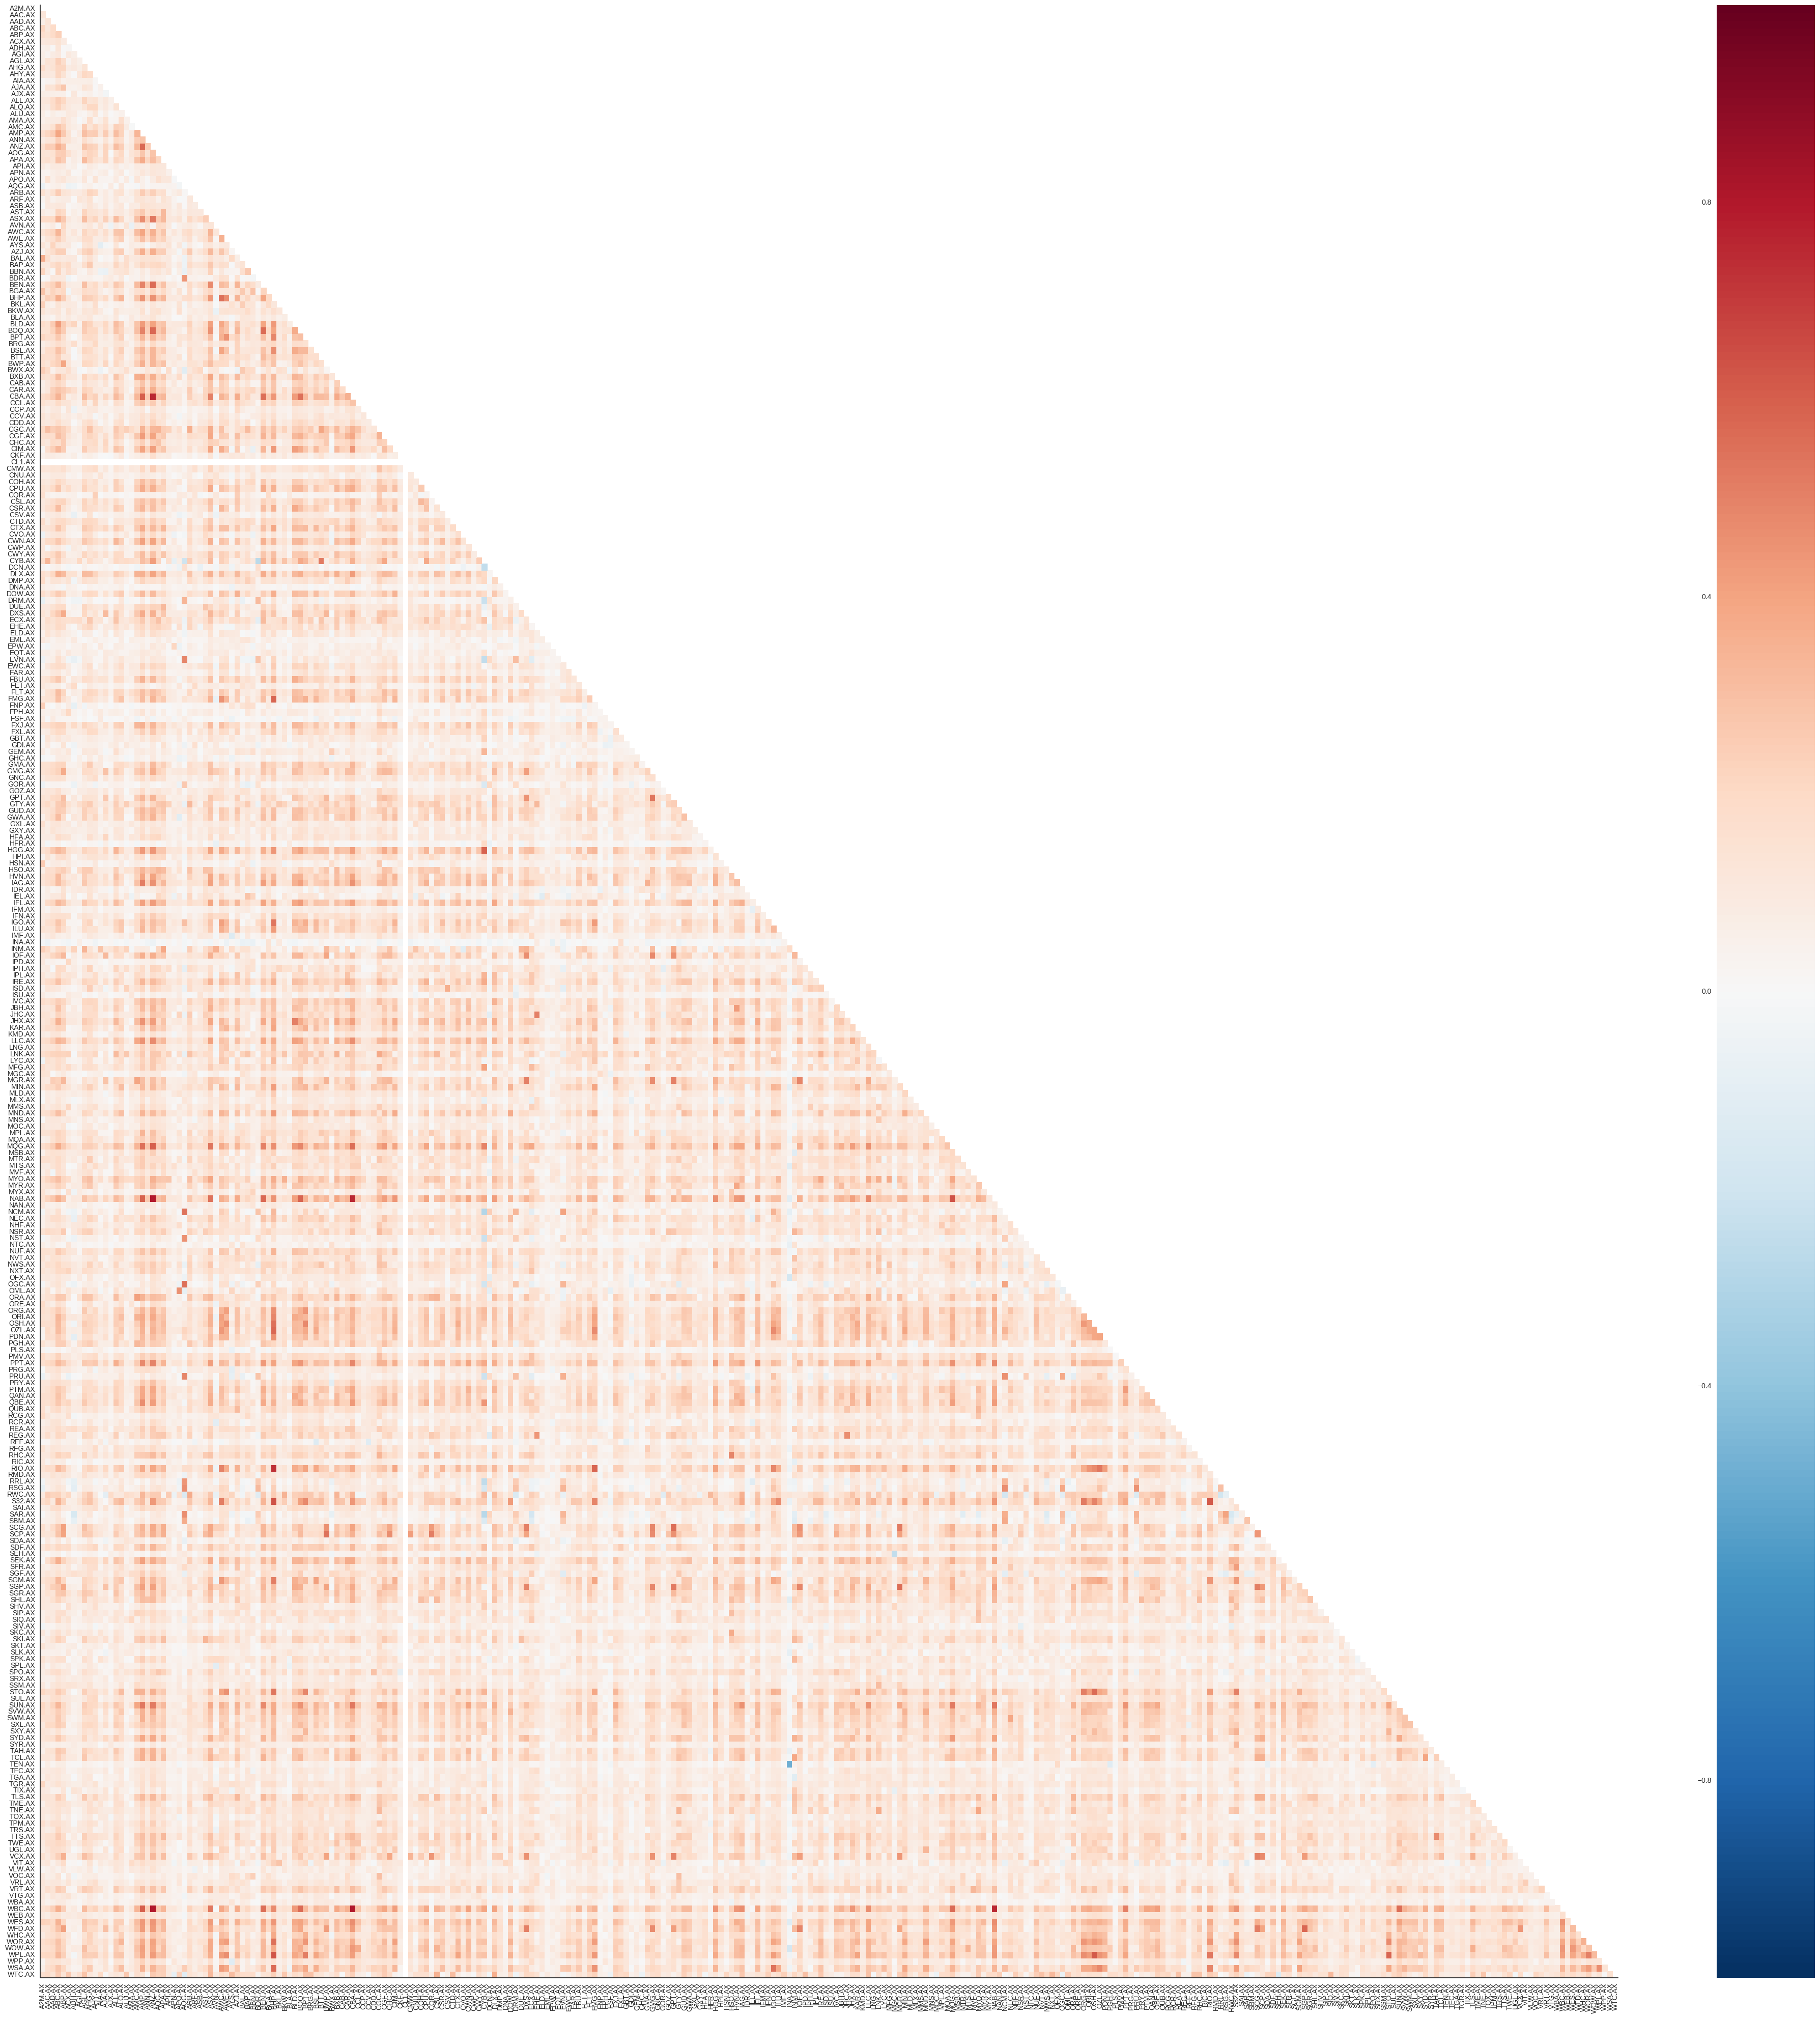

In [32]:
corr = panel['log_returns'].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(50, 50))
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, vmin=-1, vmax=1)
    sns.despine()

In [77]:
# cumulative log returns
return_index = ((panel['log_returns']).cumsum() + 1)
return_index

A2M.AX    AAC.AX    AAD.AX    ABC.AX    ABP.AX    ACX.AX  \
Date                                                                     
2006-12-19       NaN       NaN       NaN       NaN       NaN       NaN   
2006-12-20       NaN  0.997287  0.953784  1.010434  0.994458       NaN   
2006-12-21       NaN  1.002706  1.001248  1.000000  0.995230       NaN   
2006-12-22       NaN  0.991838  0.994607  0.975220  0.998013       NaN   
2006-12-25       NaN  0.991838       NaN  0.985761  1.022964       NaN   
2006-12-26       NaN  0.991838       NaN  0.985761  1.022964       NaN   
2006-12-27       NaN  0.994566       NaN  0.992978  0.998013       NaN   
2006-12-28       NaN  0.997287  0.997962  0.971627  1.009062       NaN   
2006-12-29       NaN  1.002706  0.994607  0.982359  1.019991       NaN   
2007-01-01       NaN  1.002706       NaN  0.992910  1.039401       NaN   
2007-01-02       NaN  1.034618       NaN  0.949810  1.041497       NaN   
2007-01-03       NaN  1.034618  1.008030  0.946124  0.981206       NaN   
2007-01-04       NaN  1.008090  0.994607  0.942433  0.984026       NaN   
2007-01-05       NaN  1.008090  0.997978  0.942433  1.003553       NaN   
2007-01-08       NaN  0.991838  0.991225  0.968029  0.986839       NaN   
2007-01-09       NaN  1.005405  1.001338  0.953482  0.981206       NaN   
2007-01-10       NaN  1.018789  1.004693  0.960778  0.958348       NaN   
2007-01-11       NaN  1.034618  1.014671  0.953482  0.964111       NaN   
2007-01-12       NaN  1.045039  1.001338  0.960778  0.961234       NaN   
2007-01-15       NaN  1.070618  1.008030  0.982359  0.972694       NaN   
2007-01-16       NaN  1.110220  1.008030  0.982359  0.978377       NaN   
2007-01-17       NaN  1.138931  0.974131  0.996495  0.972694       NaN   
2007-01-18       NaN  1.129454  0.981001  1.003493  0.972694       NaN   
2007-01-19       NaN  1.138931  0.984418  0.989456  0.998013       NaN   
2007-01-22       NaN  1.115062  0.974131  0.992978  1.003553       NaN   
2007-01-23       NaN  1.119886  0.956734  0.982359  1.003553       NaN   
2007-01-24       NaN  1.143642  0.956734  0.989456  1.025411       NaN   
2007-01-25       NaN  1.143642  0.987831  0.968029  1.041497       NaN   
2007-01-26       NaN  1.143642       NaN  0.978569  1.060908       NaN   
2007-01-29       NaN  1.138931       NaN  0.949810  1.041497       NaN   
...              ...       ...       ...       ...       ...       ...   
2016-11-04  2.158716  1.145577  1.379361  2.319571  0.262140  2.081805   
2016-11-07  2.199538  1.157308  1.389262  2.333177  0.258549  2.120591   
2016-11-08  2.283879  1.177510  1.379361  2.335105  0.258549  2.116961   
2016-11-09  2.231037  1.124712  1.359260  2.319571  0.247699  2.068535   
2016-11-10  2.283879  1.171780  1.418391  2.352298  0.244056  2.197284   
2016-11-11  2.264077  1.160219  1.423164  2.354190  0.244056  2.150924   
2016-11-14  2.278965  1.157308  1.379361  2.356078  0.236730  2.078032   
2016-11-15  2.278965  1.157308  1.384324  2.344693  0.229350  1.989128   
2016-11-16  2.288769  1.157308  1.366845  2.340869  0.229350  1.931727   
2016-11-17  2.283879  1.160219  1.356719  2.333177  0.240400  1.911836   
2016-11-18  2.269064  1.174649  1.384324  2.329308  0.251329  1.951229   
2016-11-21  2.248963  1.154388  1.408775  2.329308  0.244056  1.980829   
2016-11-22  2.317617  1.174649  1.394176  2.344693  0.297355  1.972461   
2016-11-23  2.377405  1.148523  1.418391  2.354190  0.300809  1.989128   
2016-11-24  2.377405  1.136688  1.403932  2.342783  0.300809  1.978744   
2016-11-25  2.395105  1.148523  1.446694  2.357963  0.311101  1.980829   
2016-11-28  2.377405  1.136688  1.469684  2.348503  0.311101  1.978744   
2016-11-29  2.403839  1.115635  1.451335  2.337030  0.311101  1.955511   
2016-11-30  2.438030  1.121696  1.442032  2.321526  0.328021  1.931727   
2016-12-01  2.471091  1.136688  1.446694  2.323477  0.304251  1.870828   
2016-12-02  2.363922  1.094129  1.455954  2.331244  0.297355  1.844914   
2016-12-05  2.3548

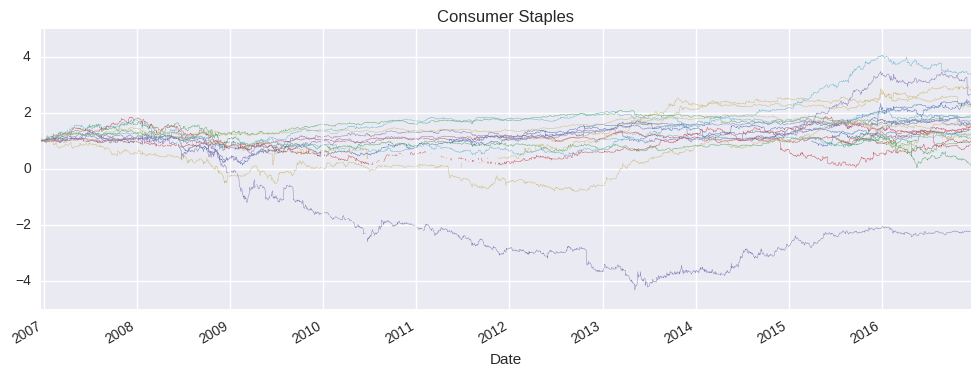

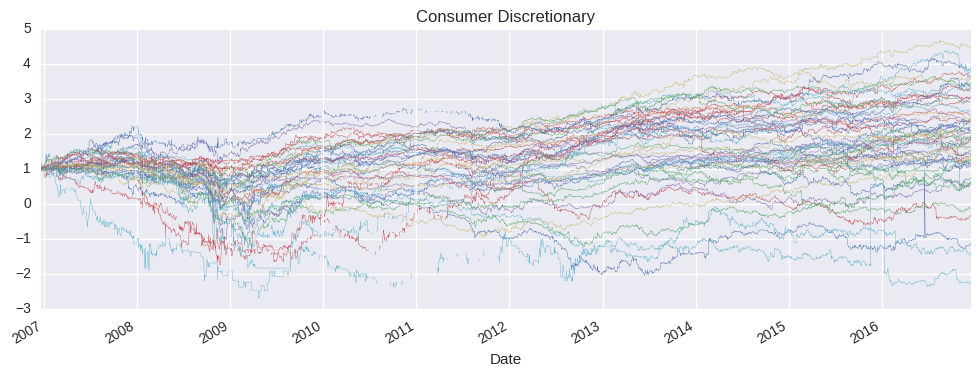

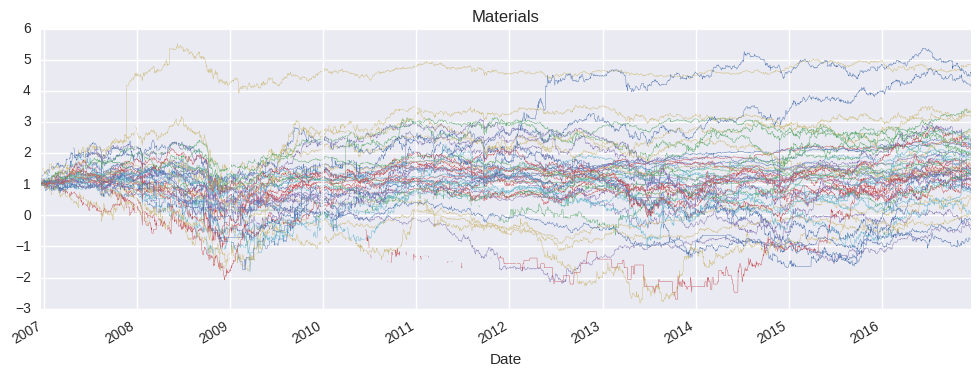

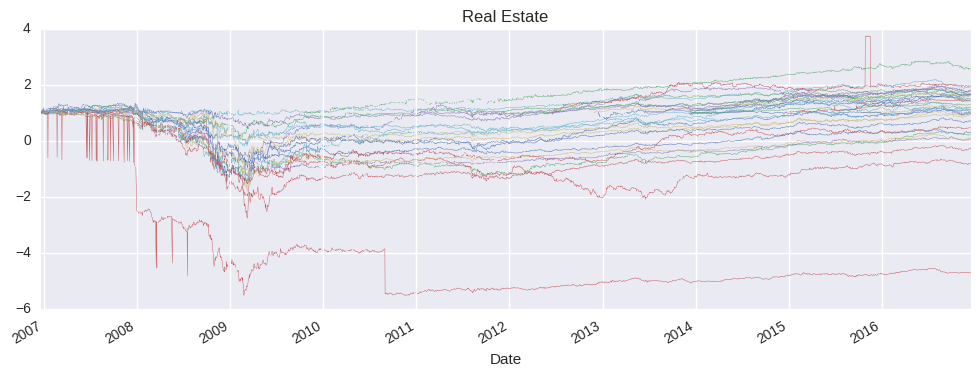

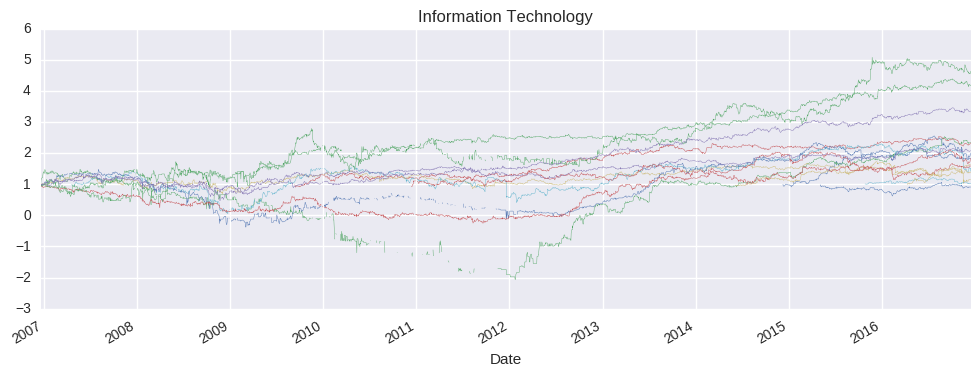

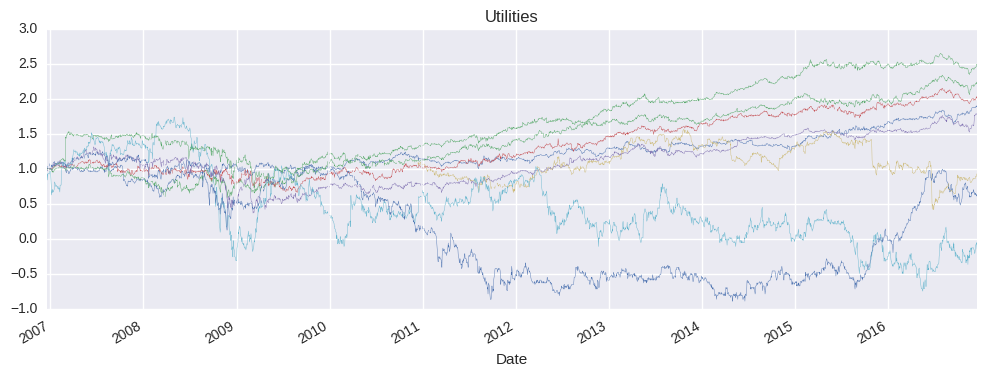

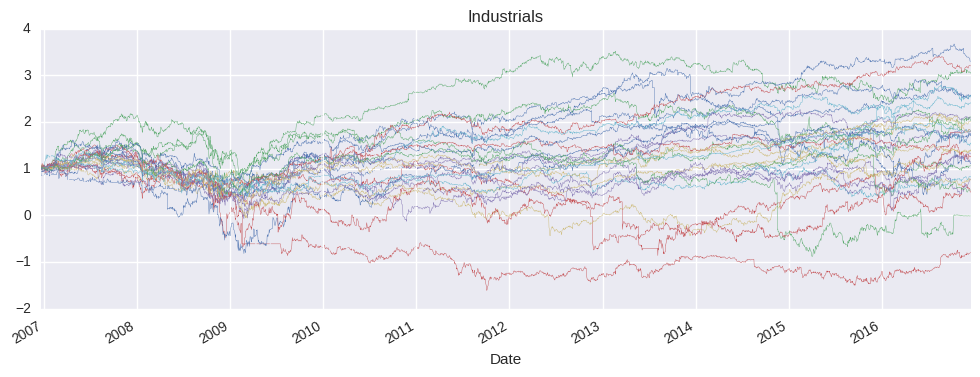

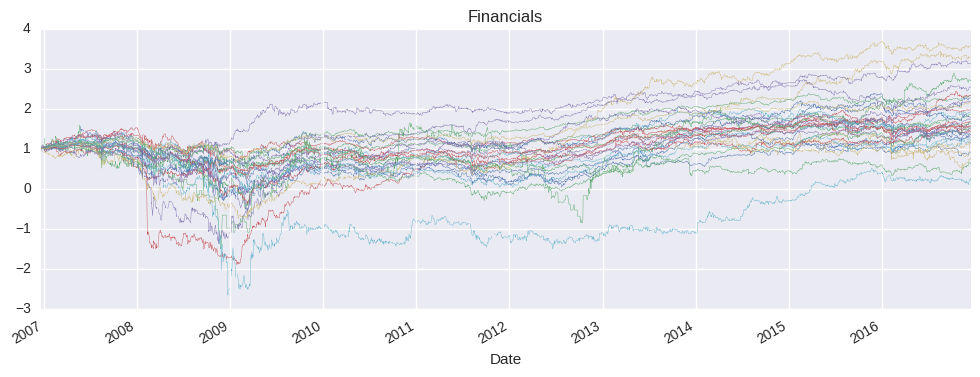

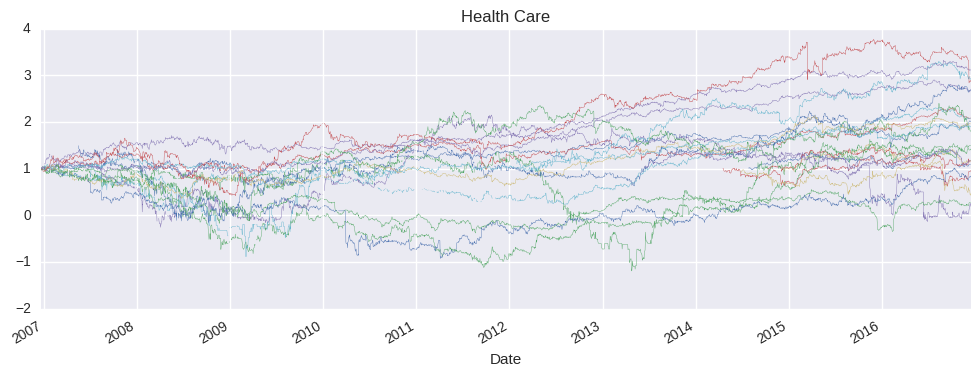

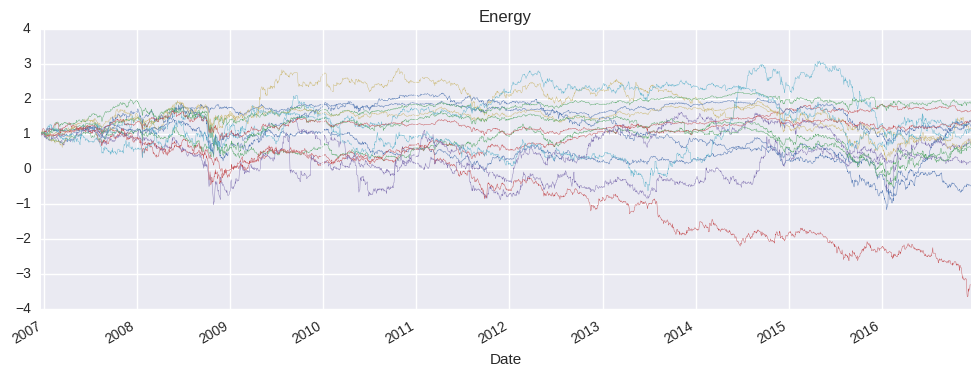

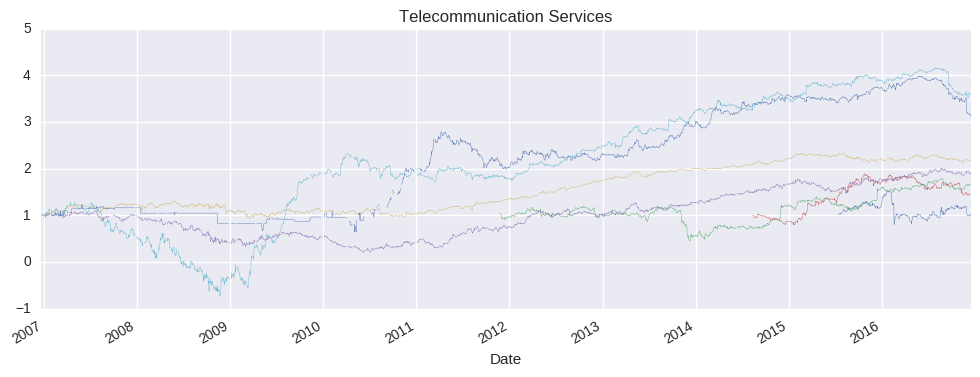

In [75]:
for sector in sectors:
    tickers = index[index['sector'] == sector]['yahoo_ticker']
    
    ax = return_index[tickers].plot(
            figsize=(12,4)
            ,linewidth=0.3
            ,legend=False
            ,title=sector)
    ax